# Exemple compléxité min-max

In [5]:
from random import randrange
from timeit import repeat, timeit
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from IPython.display import display

sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize": (11.7, 8.27)})


def make_array(length=100, max_range=1000):
    """returns an array of integers in [0, `max_range`[ of length `length`"""
    return [randrange(max_range) for _ in range(length)]


NB_EXECS = 1
MAX_EXPONENT = 6
MIN_EXPONENT = 1
NB_REPEAT = 5
BASE = 10


In [8]:
def min_max_etudiant(arr):
    the_min = arr[0]
    the_max = arr[0]
    for v in arr:
        if v < the_min:
            the_min = v
        if v > the_max:
            the_max = v

    return the_min, the_max


def min_max_sorter(arr):
    s = sorted(arr)
    return s[0], s[-1]


def min_max_pythonista(arr):
    return min(arr), max(arr)


In [6]:
functs = (min_max_etudiant, min_max_sorter, min_max_pythonista)


def do_exp_min_max(lengths):
    results = {}
    for length in lengths:
        result = {}
        for funct in functs:
            # print(f"Repeat {NB_REPEAT} times {NB_EXECS} executions on length {length} for {funct.__name__}")
            test_array = make_array(length, 2 * length)
            times = repeat(lambda: funct(test_array), repeat=NB_REPEAT, number=NB_EXECS)
            result[funct.__name__] = [time / NB_EXECS for time in times]
        results[length] = result
    return [
        {"size": size, "function": f, "time": t} for size, res in results.items() for f, ts in res.items() for t in ts
    ]


<AxesSubplot:xlabel='size', ylabel='time'>

<Figure size 842.4x595.44 with 1 Axes>

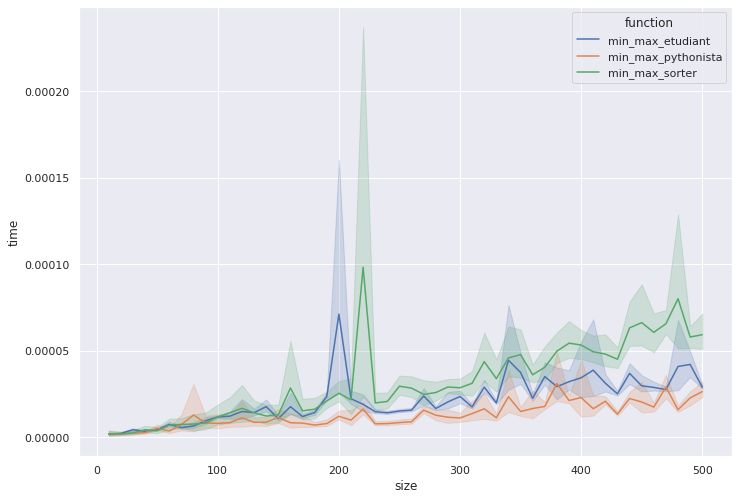

In [7]:
results = do_exp_min_max(range(10, 501, 10))

data = pd.DataFrame.from_records(
    results,
).sort_values(["size", "function"])

sns.lineplot(data=data, x="size", y="time", hue="function")


Repeat 5 times 1 executions on length 100000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 100000 for ex_min_max
Repeat 5 times 1 executions on length 100000 for ex_sorted
Repeat 5 times 1 executions on length 100000 for ex_manual
Repeat 5 times 1 executions on length 200000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 200000 for ex_min_max
Repeat 5 times 1 executions on length 200000 for ex_sorted
Repeat 5 times 1 executions on length 200000 for ex_manual
Repeat 5 times 1 executions on length 300000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 300000 for ex_min_max
Repeat 5 times 1 executions on length 300000 for ex_sorted
Repeat 5 times 1 executions on length 300000 for ex_manual
Repeat 5 times 1 executions on length 400000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 400000 for ex_min_max
Repeat 5 times 1 executions on length 400000 for ex_sorted
Repeat 5 times 1 executions on length 400000 for ex_manual
Repeat 5 times 1 executi

<AxesSubplot:xlabel='size', ylabel='time'>

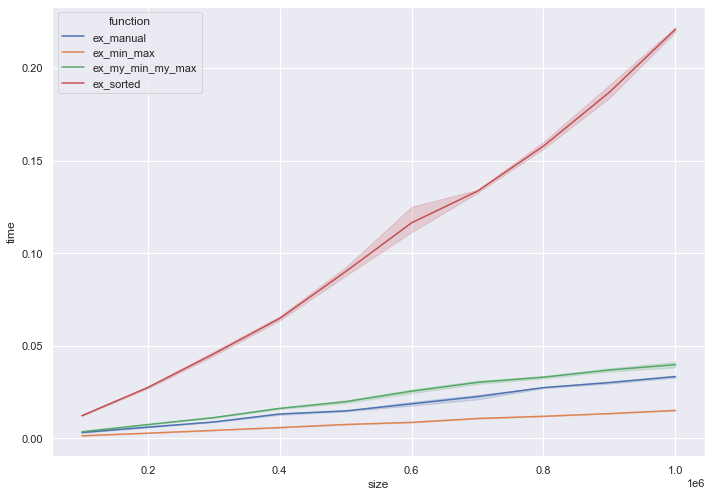

In [258]:
lengths = list(range(BASE ** (MAX_EXPONENT - 1), BASE ** (MAX_EXPONENT) + 1, BASE ** (MAX_EXPONENT - 1)))
results = do_exp_min_max(lengths)

data = pd.DataFrame.from_records(
    results,
).sort_values(["size", "function"])

sns.lineplot(data=data, x="size", y="time", hue="function")


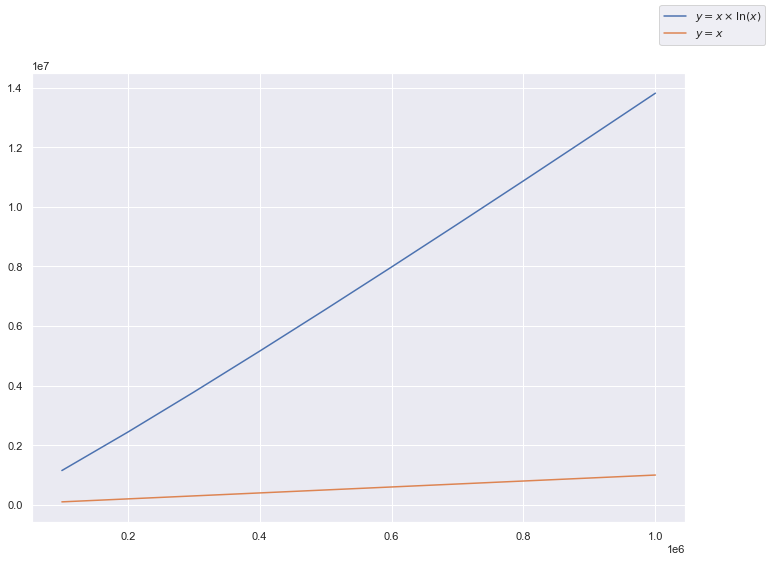

In [263]:
xs = lengths

fig = plt.figure()
sns.lineplot(x=xs, y= np.log(xs)*xs)
sns.lineplot(x=xs, y= xs)
fig.legend(labels=["$y = x \\times \\ln(x)$", "$y = x$"])
plt.show()